In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df = pd.read_csv("data.csv")
df.drop(columns=['index', 'datehour', 'datemonth'], inplace=True, errors='ignore')

df['Date_Heure'] = pd.to_datetime(df['Date_Heure'], format='%m/%d/%Y %H:%M')
df['hour'] = df['Date_Heure'].dt.hour
df['day'] = df['Date_Heure'].dt.day
df['month'] = df['Date_Heure'].dt.month

features = ['Pression au niveau mer', 'Variation de pression en 3 heures',
            'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn',
            'Temperature', 'Point de rosee', 'Humidite', 'Visibilite horizontale',
            'Pression station', 'hour', 'day', 'month']
target = 'consommation'

for col in df.columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

print("Valeurs manquantes par colonne:")
print(df.isnull().sum())

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Valeurs manquantes par colonne:
Date_Heure                                    0
Pression au niveau mer                        0
Variation de pression en 3 heures             0
Type de tendance barometrique                 0
Direction du vent moyen 10 mn                 0
Vitesse du vent moyen 10 mn                   0
Temperature                                   0
Point de rosee                                0
Humidite                                      0
Visibilite horizontale                        0
Temps present                                 0
Pression station                              0
Rafales sur une periode                       0
Periode de mesure de la rafale                0
Precipitations dans la derniere heure         0
Precipitations dans les 3 dernieres heures    0
Temperature (C)                               0
consommation                                  0
hour                                          0
day                                           0
month   

C:\Users\hp\AppData\Local\Temp\ipykernel_15320\1598686158.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [3]:

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [4]:

y_pred = model.predict(X_test_poly)

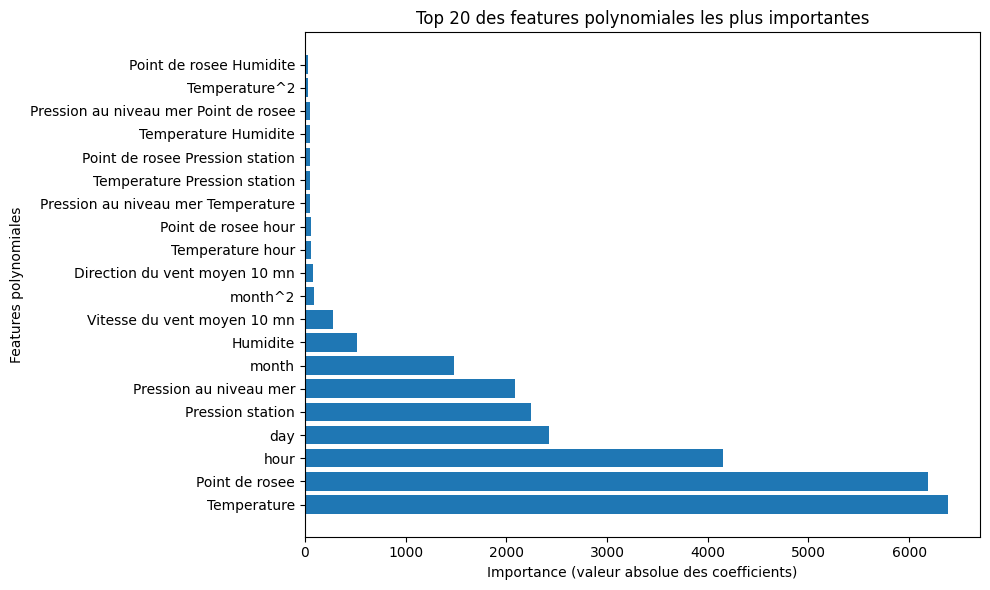

In [5]:

feature_names = poly.get_feature_names_out(features)
coefs = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(model.coef_)
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coefs['feature'][:20], coefs['importance'][:20])
plt.xlabel("Importance (valeur absolue des coefficients)")
plt.ylabel("Features polynomiales")
plt.title("Top 20 des features polynomiales les plus importantes")
plt.tight_layout()
plt.show()


In [6]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

MSE: 12196719.654519118
R2 Score: 0.6695604261573271
MAE: 2569.0975699460914


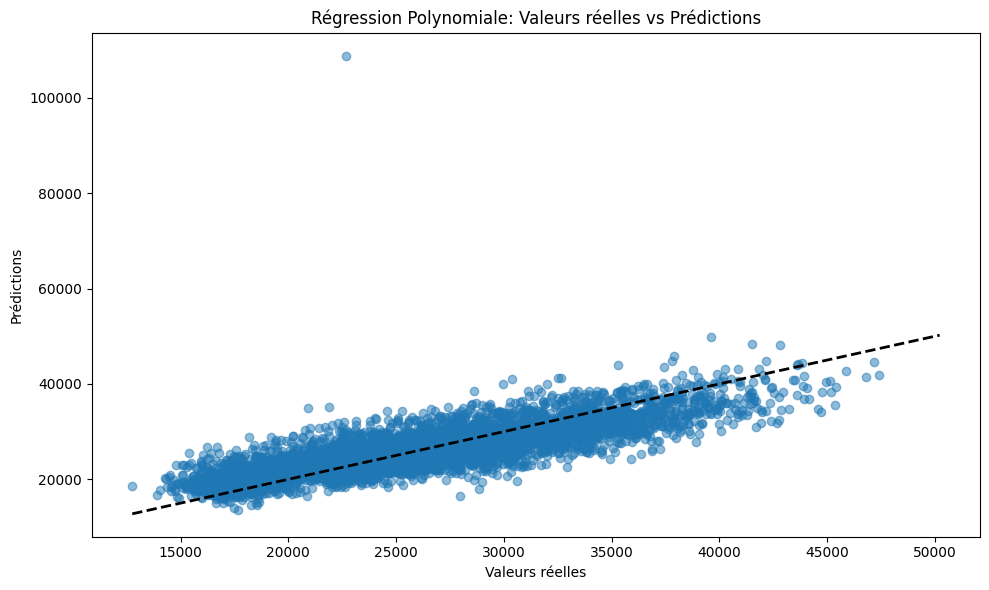

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Régression Polynomiale: Valeurs réelles vs Prédictions')
plt.tight_layout()
plt.show()

In [8]:
new_data = pd.read_csv("new_data1.csv")

for col in features:
    if col not in new_data.columns:
        new_data[col] = 0

X_new = new_data[features]

poly = PolynomialFeatures(degree=2)
poly.fit(X_train) 

X_new_poly = poly.transform(X_new)


predictions = model.predict(X_new_poly)


print(" Prédictions détaillées :")
for i, value in enumerate(predictions, 1):
    print(f"Prédiction consommation pour la ligne {i} : {value:.6f} kW")

 Prédictions détaillées :
Prédiction consommation pour la ligne 1 : 25843.157767 kW
Prédiction consommation pour la ligne 2 : 27408.647085 kW
